<a href="https://colab.research.google.com/github/vitor-manoel-s/desafio-DIO-matriz-de-confuzao-metricas/blob/main/matriz_de_confusao_metricas_de_avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [90]:
# Carregar o dataset iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

In [91]:
# Serara os dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=0)

In [92]:
# Executar classificador
classificador = svm.SVC(kernel='linear', C=1.0)

In [93]:
classificador.fit(X_treino, y_treino)

SVC(kernel='linear')

In [94]:
classificador.predict(X_teste)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [95]:
y_pred = classificador.predict(X_teste)

In [96]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [97]:
y_teste

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [98]:
# Calculando métricas
acuracia = accuracy_score(y_teste, y_pred)
precisao = precision_score(y_teste, y_pred, average='macro')
revocacao = recall_score(y_teste, y_pred, average='macro')
f1 = f1_score(y_teste, y_pred, average='macro')

print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Revocação: {revocacao:.4f}")
print(f"F1 Score: {f1:.4f}")

Acurácia: 0.9737
Precisão: 0.9667
Revocação: 0.9792
F1 Score: 0.9717


In [99]:
# Relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [100]:
# Matriz de Confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)

# Exibir a matriz de confusão
print("\nMatriz de Confusão:")
print(matriz_confusao)


Matriz de Confusão:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


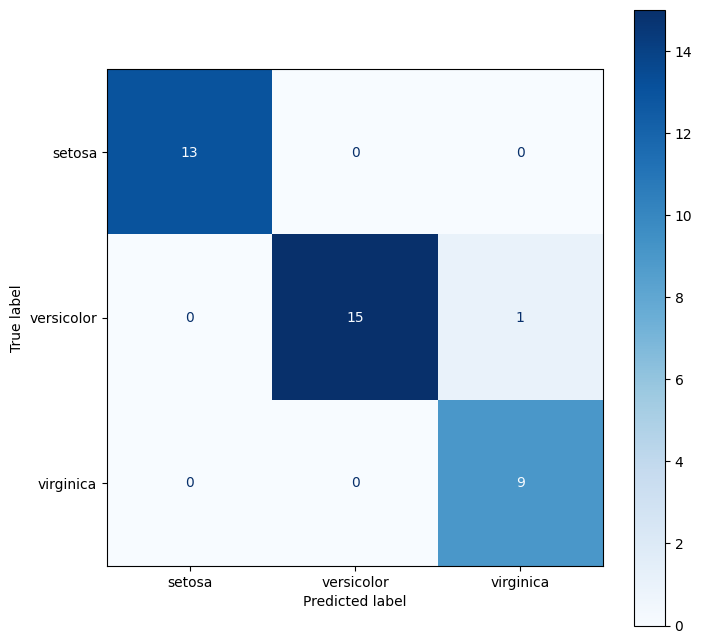

In [101]:
# Plotar matriz de confusão
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax)

### Calculando métricas a partir da Matriz de Confusão

In [102]:
acuracia_matriz = matriz_confusao.diagonal().sum() / matriz_confusao.sum()
print(f"Acurácia: {acuracia_matriz:.4f}")

Acurácia: 0.9737


In [103]:
precisao_classe = matriz_confusao.diagonal() / matriz_confusao.sum(axis=0)
print(f"Precisão por Classe: {precisao_classe}")

pricisao_macro = np.mean(precisao_classe)
print(f"Precisão Macro: {pricisao_macro:.4f}")

Precisão por Classe: [1.  1.  0.9]
Precisão Macro: 0.9667


In [104]:
revocacao_classe = matriz_confusao.diagonal() / matriz_confusao.sum(axis=1)
print(f"Revocação por Classe: {revocacao_classe}")

revocacao_macro = np.mean(revocacao_classe)
print(f"Revocação Macro: {revocacao_macro:.4f}")

Revocação por Classe: [1.   0.94 1.  ]
Revocação Macro: 0.9792


In [105]:
f1_classe = 2 * (precisao_classe * revocacao_classe) / (precisao_classe + revocacao_classe)
print(f"F1 Score por Classe: {f1_classe}")

f1_macro = np.mean(f1_classe)
print(f"F1 Score Macro: {f1_macro:.4f}")

F1 Score por Classe: [1.   0.97 0.95]
F1 Score Macro: 0.9717
